# Tax or Trade

#### Notebook for setting up, running and visualising the agent based model

### How to use:

1. Update the variables as required
2. Run the cell containing the variables
3. Run the cell calling the java file (or do this from a terminal)
4. Wait for the model to complete (usually only a couple of seconds)
5. Run the cell setting up the plots

## Cell 1: Import and variable setting

| Variable        | Values                | Purpose/notes                                                   |
|-----------------|-----------------------|-----------------------------------------------------------------|
| ```runs```      | Positive Integer      | will slow down at very high values                              |
| ```seed```      | Integer               | The initial seed value - this will increase by 1 per run        |
| ```isTax```     | Boolean               | ```True``` if modelling tax, ```False``` for trade              |
| ```initial```   | Float in range [TODO] | The initial tax rate or cap                                     |
| ```increment``` | Float in range [TODO] | The amount by which the tax increases or cap decreases per year |
| ```preset```    | String from list below| The preset split of power types, list of presets at bottom of notebook|



In [1]:
from functions import analysis
from matplotlib import pyplot as plt

runs            = 50          
seed            = 1                   
initialTax      = '0100'
incrementTax    = '0050'
initialTrade    = '5x10-9'
incrementTrade  = '1x10-6'
preset          = 'US-2007' 

analysis = analysis(runs, seed, initialTrade, incrementTrade, initialTax, incrementTax, preset)

## Cell 2: Run the model

The first two lines recompile the program and move it to this directory, keep them commented out if not needed

In [2]:
! cd ../final/ && mvn clean compile assembly:single -q && cd ../finalAnalysis/
! mv ../final/target/final-1.0-SNAPSHOT-jar-with-dependencies.jar model.jar && echo "Built and moved the model"

args = analysis.getJarArguments()
! java -jar model.jar $args

Finished 100 Tax runs with seeds in the range [1, 100]


## Cell 3: Show the area plots

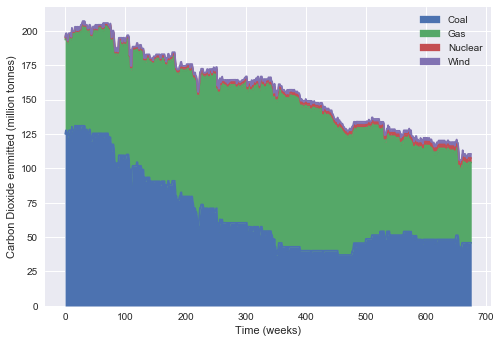

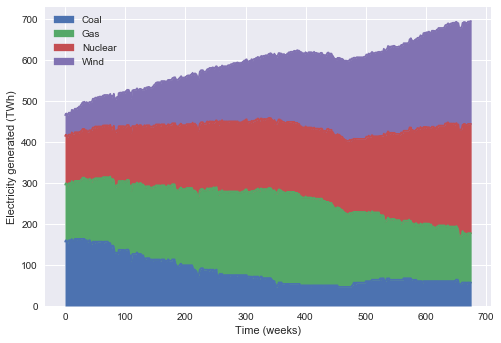

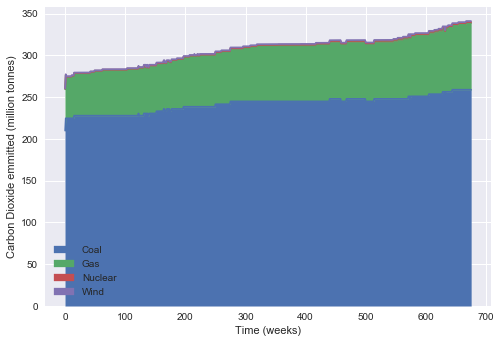

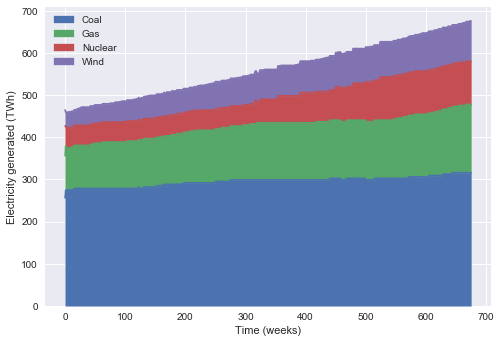

In [3]:
analysis.plotArea()
plt.show()

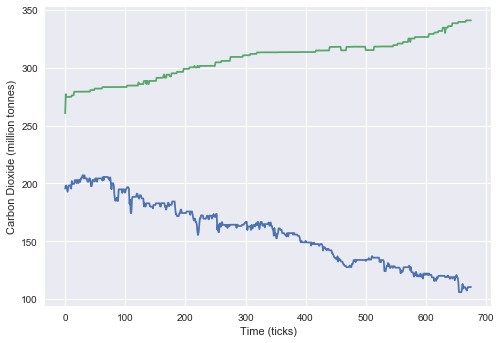

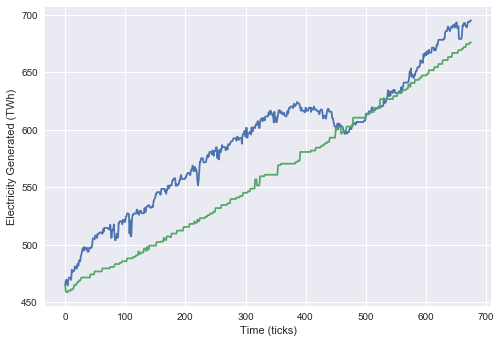

In [4]:
analysis.plotComparison()

## Presets:

| Name    | Origin                   | Coal  | Gas   | Nuclear | Wind  |
|---------|--------------------------|-------|-------|---------|-------|
| US-2007 | United States 2007 split | 0.49  | 0.22  | 0.19    | 0.08  |
| US-2020 | United States 2020 split | 0.197 | 0.406 | 0.197   | 0.198 |
| EU-2016 | European Union in 2016   | 0.206 | 0.221 | 0.304   | 0.269 |
| equal   | not applicable           | 0.25  | 0.25  | 0.25    | 0.25  |



In [5]:
mv 

usage: mv [-f | -i | -n] [-v] source target
       mv [-f | -i | -n] [-v] source ... directory
